In [1]:
using CairoMakie

In [2]:
set_theme!(theme_dark())

In [77]:
include("egm_code.jl")

Starting price iteration
//////////////////////
Price iteration: 0
R_lb = 0.92, R_ub = 1.1111111111111112
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.1383213578639782
--------------------
Iteration: 500, Error: 0.007858131285838331
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 0, R = 1.0155555555555555, w = 0.018920262276054915, Ks = 0.028052678083857027, Kd = 0.06971728983491507, diff = -0.04166461175105804
%%%%%%%%%%%%%%%
//////////////////////
Price iteration: 1
R_lb = 0.92, R_ub = 1.1111111111111112
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.0661012252738476
--------------------
Iteration: 500, Error: 0.007263576057382219
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 1, R = 1.0633333333333335, w = 0.016550725541417403, Ks = 15.77313532011427, Kd = 0.046478193223276676, diff = 15.726657126890993
%%%%%%%%%%%%%%%
//////////////////////


In [ ]:
model = create_EGM_model_aiyagari(;na = 101, nz = 19)

In [74]:
a_init = initial_guess(model)
assets_today = zeros(model.na, model.nz)
policy = copy(assets_today)
c = copy(assets_today)
rearrange_budget = copy(assets_today)

L = labour_supply(model)
Kd = ((model.A^model.α * L ^ (1 - model.α)) / (model.R_iter + model.δ - 1)) ^ 1 / (1 - model.α)
s, c = egm_find_policies(a_init, assets_today, policy, c, rearrange_budget, model)

M = zeros(model.na, model.nz, model.na, model.nz)
O = zeros(model.n, model.n)
X = zeros(model.n+1, model.n)
Y = zeros(model.n+1)
Dist = zeros(model.n)
Dist = invariant_distribution(M, O, X, Y, Dist, s, model)

G = reshape(s, model.n, 1)
Ks = dot(Dist', G)
diff = Ks - Kd

/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 0.28518440777914894
--------------------
Iteration: 500, Error: 0.00724008810852769
--------------------
/// Found Policy Functions ///


0.0003681867394053351

In [4]:
dist, wealth, pol = find_equilibrium(model)

Starting price iteration
//////////////////////
Price iteration: 0
R_iter = 0.9708333333333334
Kd = 0.3993727732067193
w_iter = 2.6925865089609946
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 2.419997864878164
--------------------
Iteration: 500, Error: 0.49784485245949567
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 0, r = 0.9708333333333334, w = 2.6925865089609946, Ks = 4.3048248105031135, Kd = 0.3993727732067193, diff = 3.9054520372963943
%%%%%%%%%%%%%%%
//////////////////////
Price iteration: 1
R_iter = 0.9354166666666668
Kd = 0.7987455464134362
w_iter = 3.3846172538210055
/// Finding Policy Functions... ///
--------------------
Iteration: 0, Error: 1.0993531415769555
--------------------
Iteration: 500, Error: 1.1176804824796507
--------------------
/// Found Policy Functions ///
%%%%%%%%%%%%%%%
Price iteration: 1, r = 0.9354166666666668, w = 3.3846172538210055, Ks = 45.15488747084535, Kd = 0.7987455464134362

UndefVarError: UndefVarError: `w_final` not defined

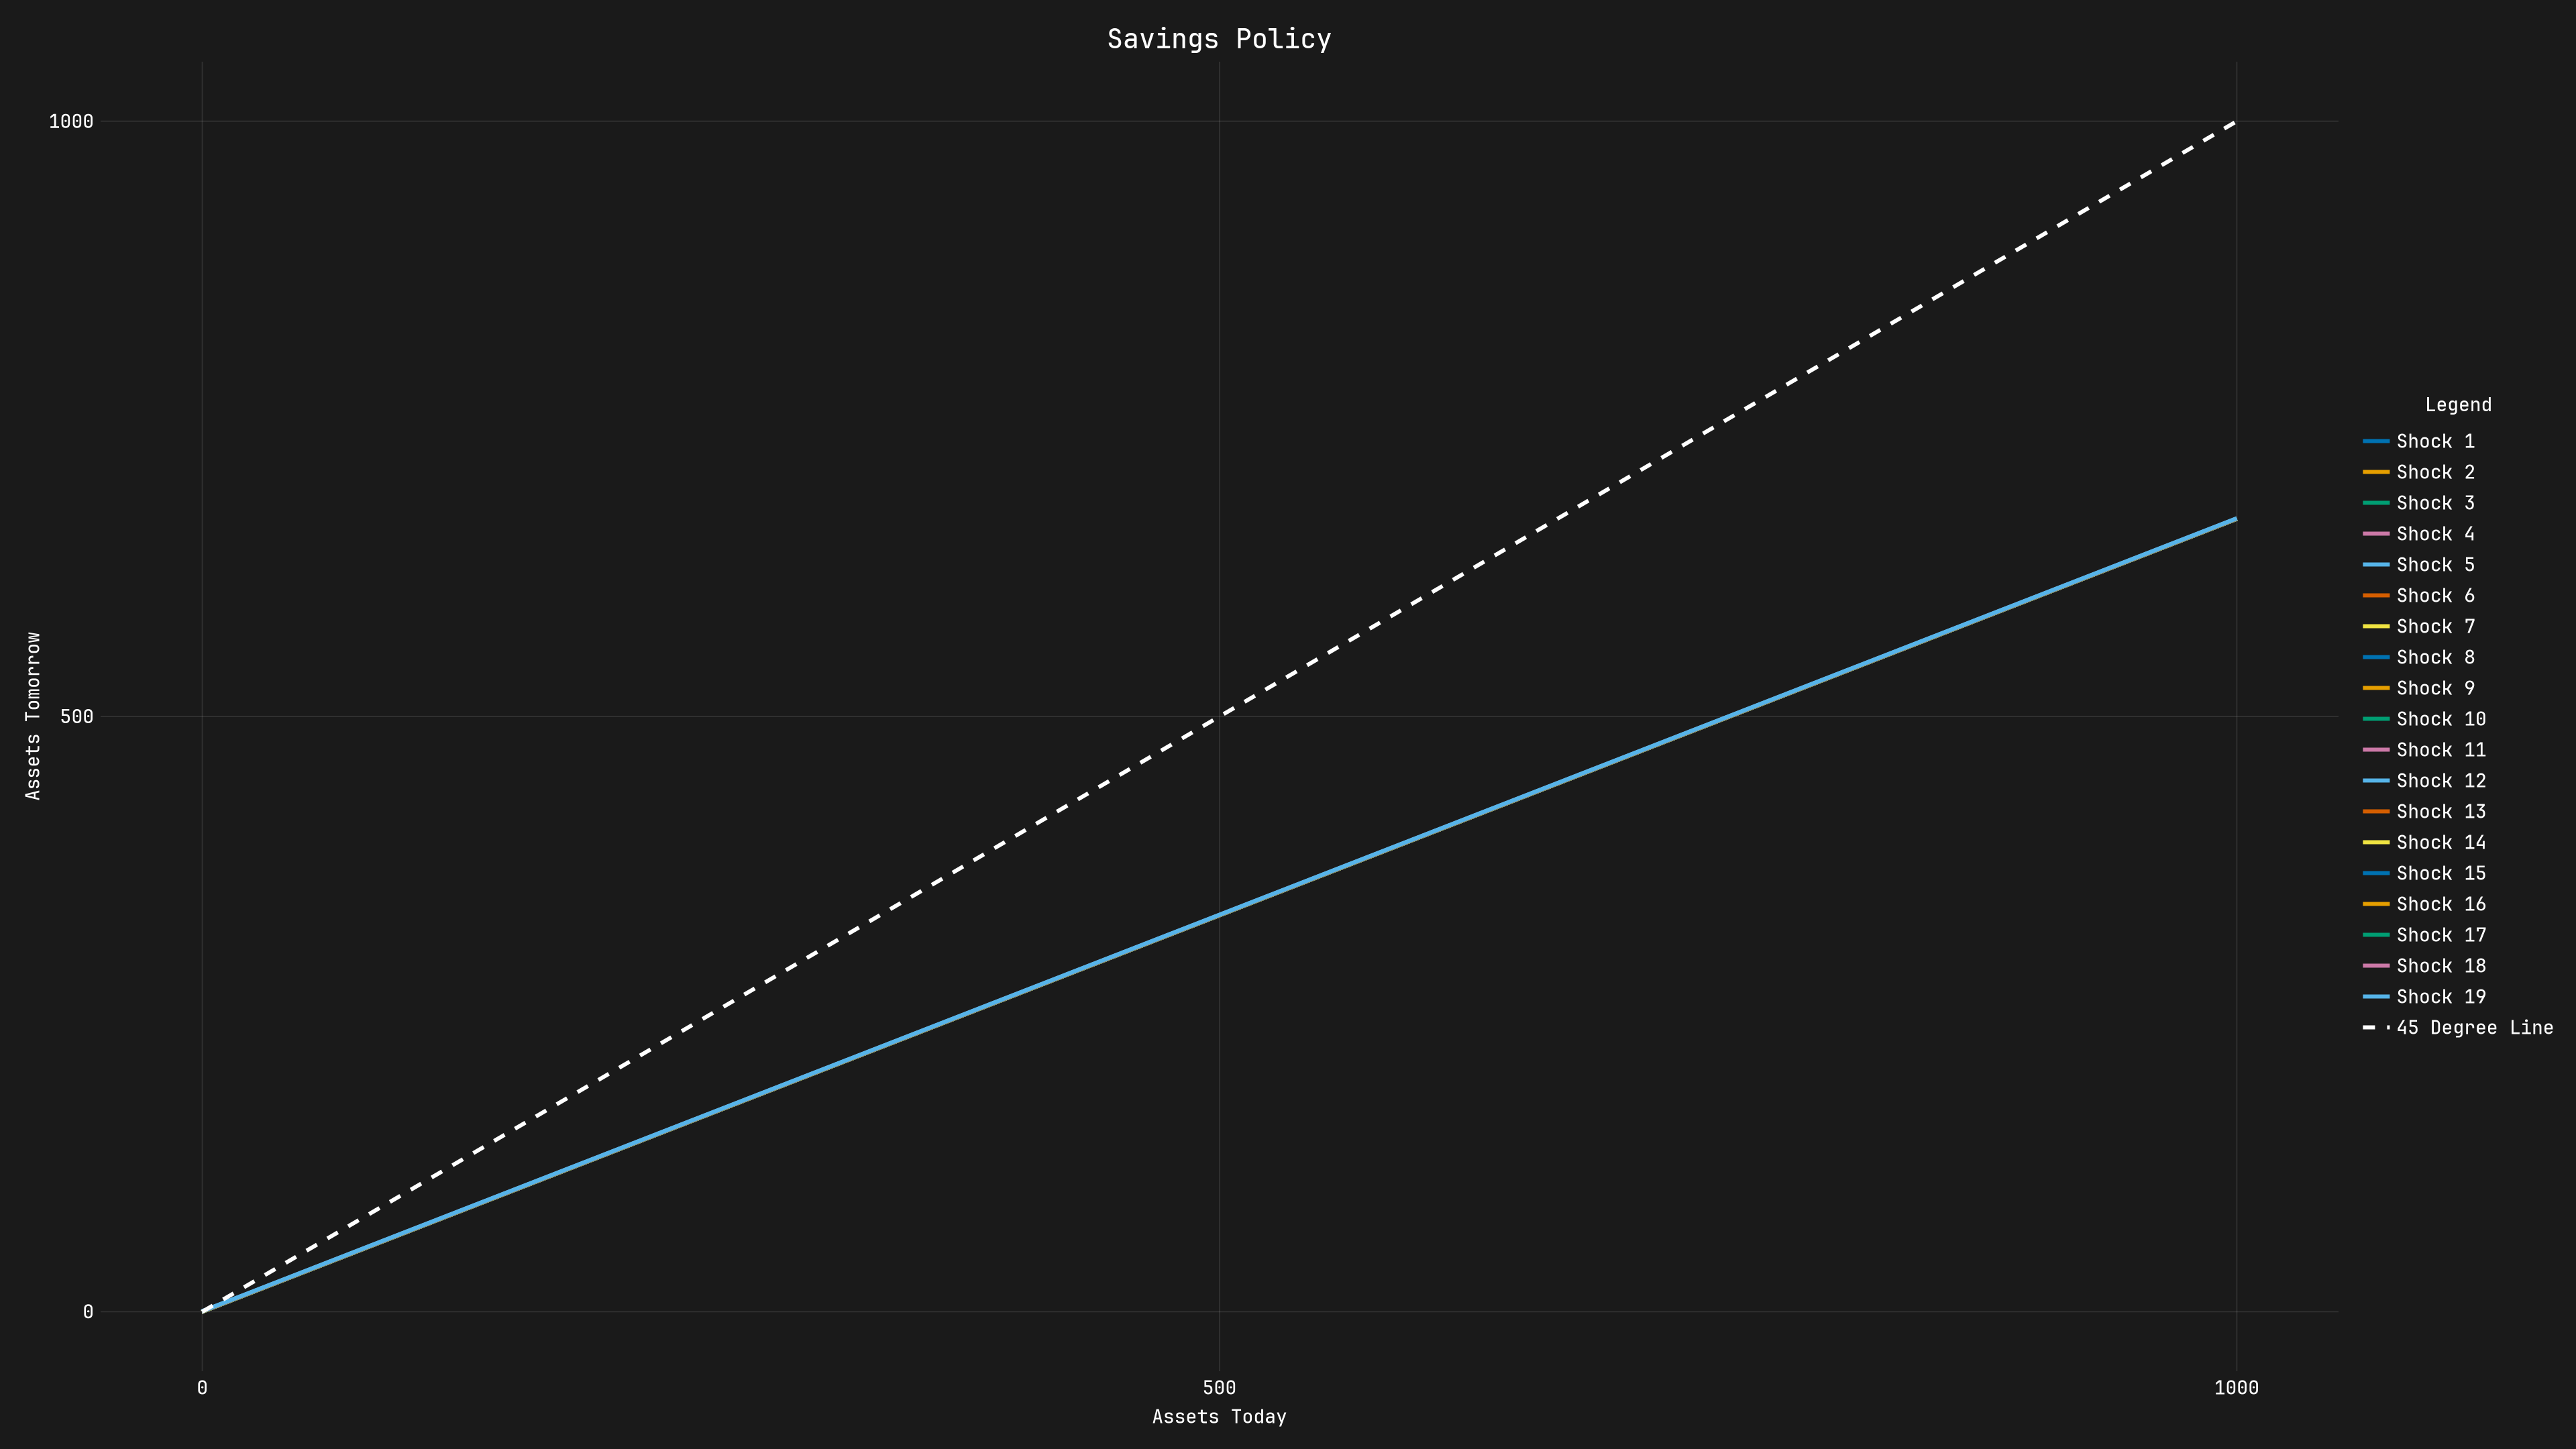

In [75]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Savings Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets Today",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Assets Tomorrow", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

#xlims!(ax, 0, 1)
#ylims!(ax, 0, 1)

for z in 1:model.nz
    lines!(ax, model.agrid, s[:, z], linewidth = 3, label = "Shock $z")
end

lines!(ax, model.agrid, model.agrid, color = :white, linestyle = :dash, linewidth = 3, label = "45 Degree Line")

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig

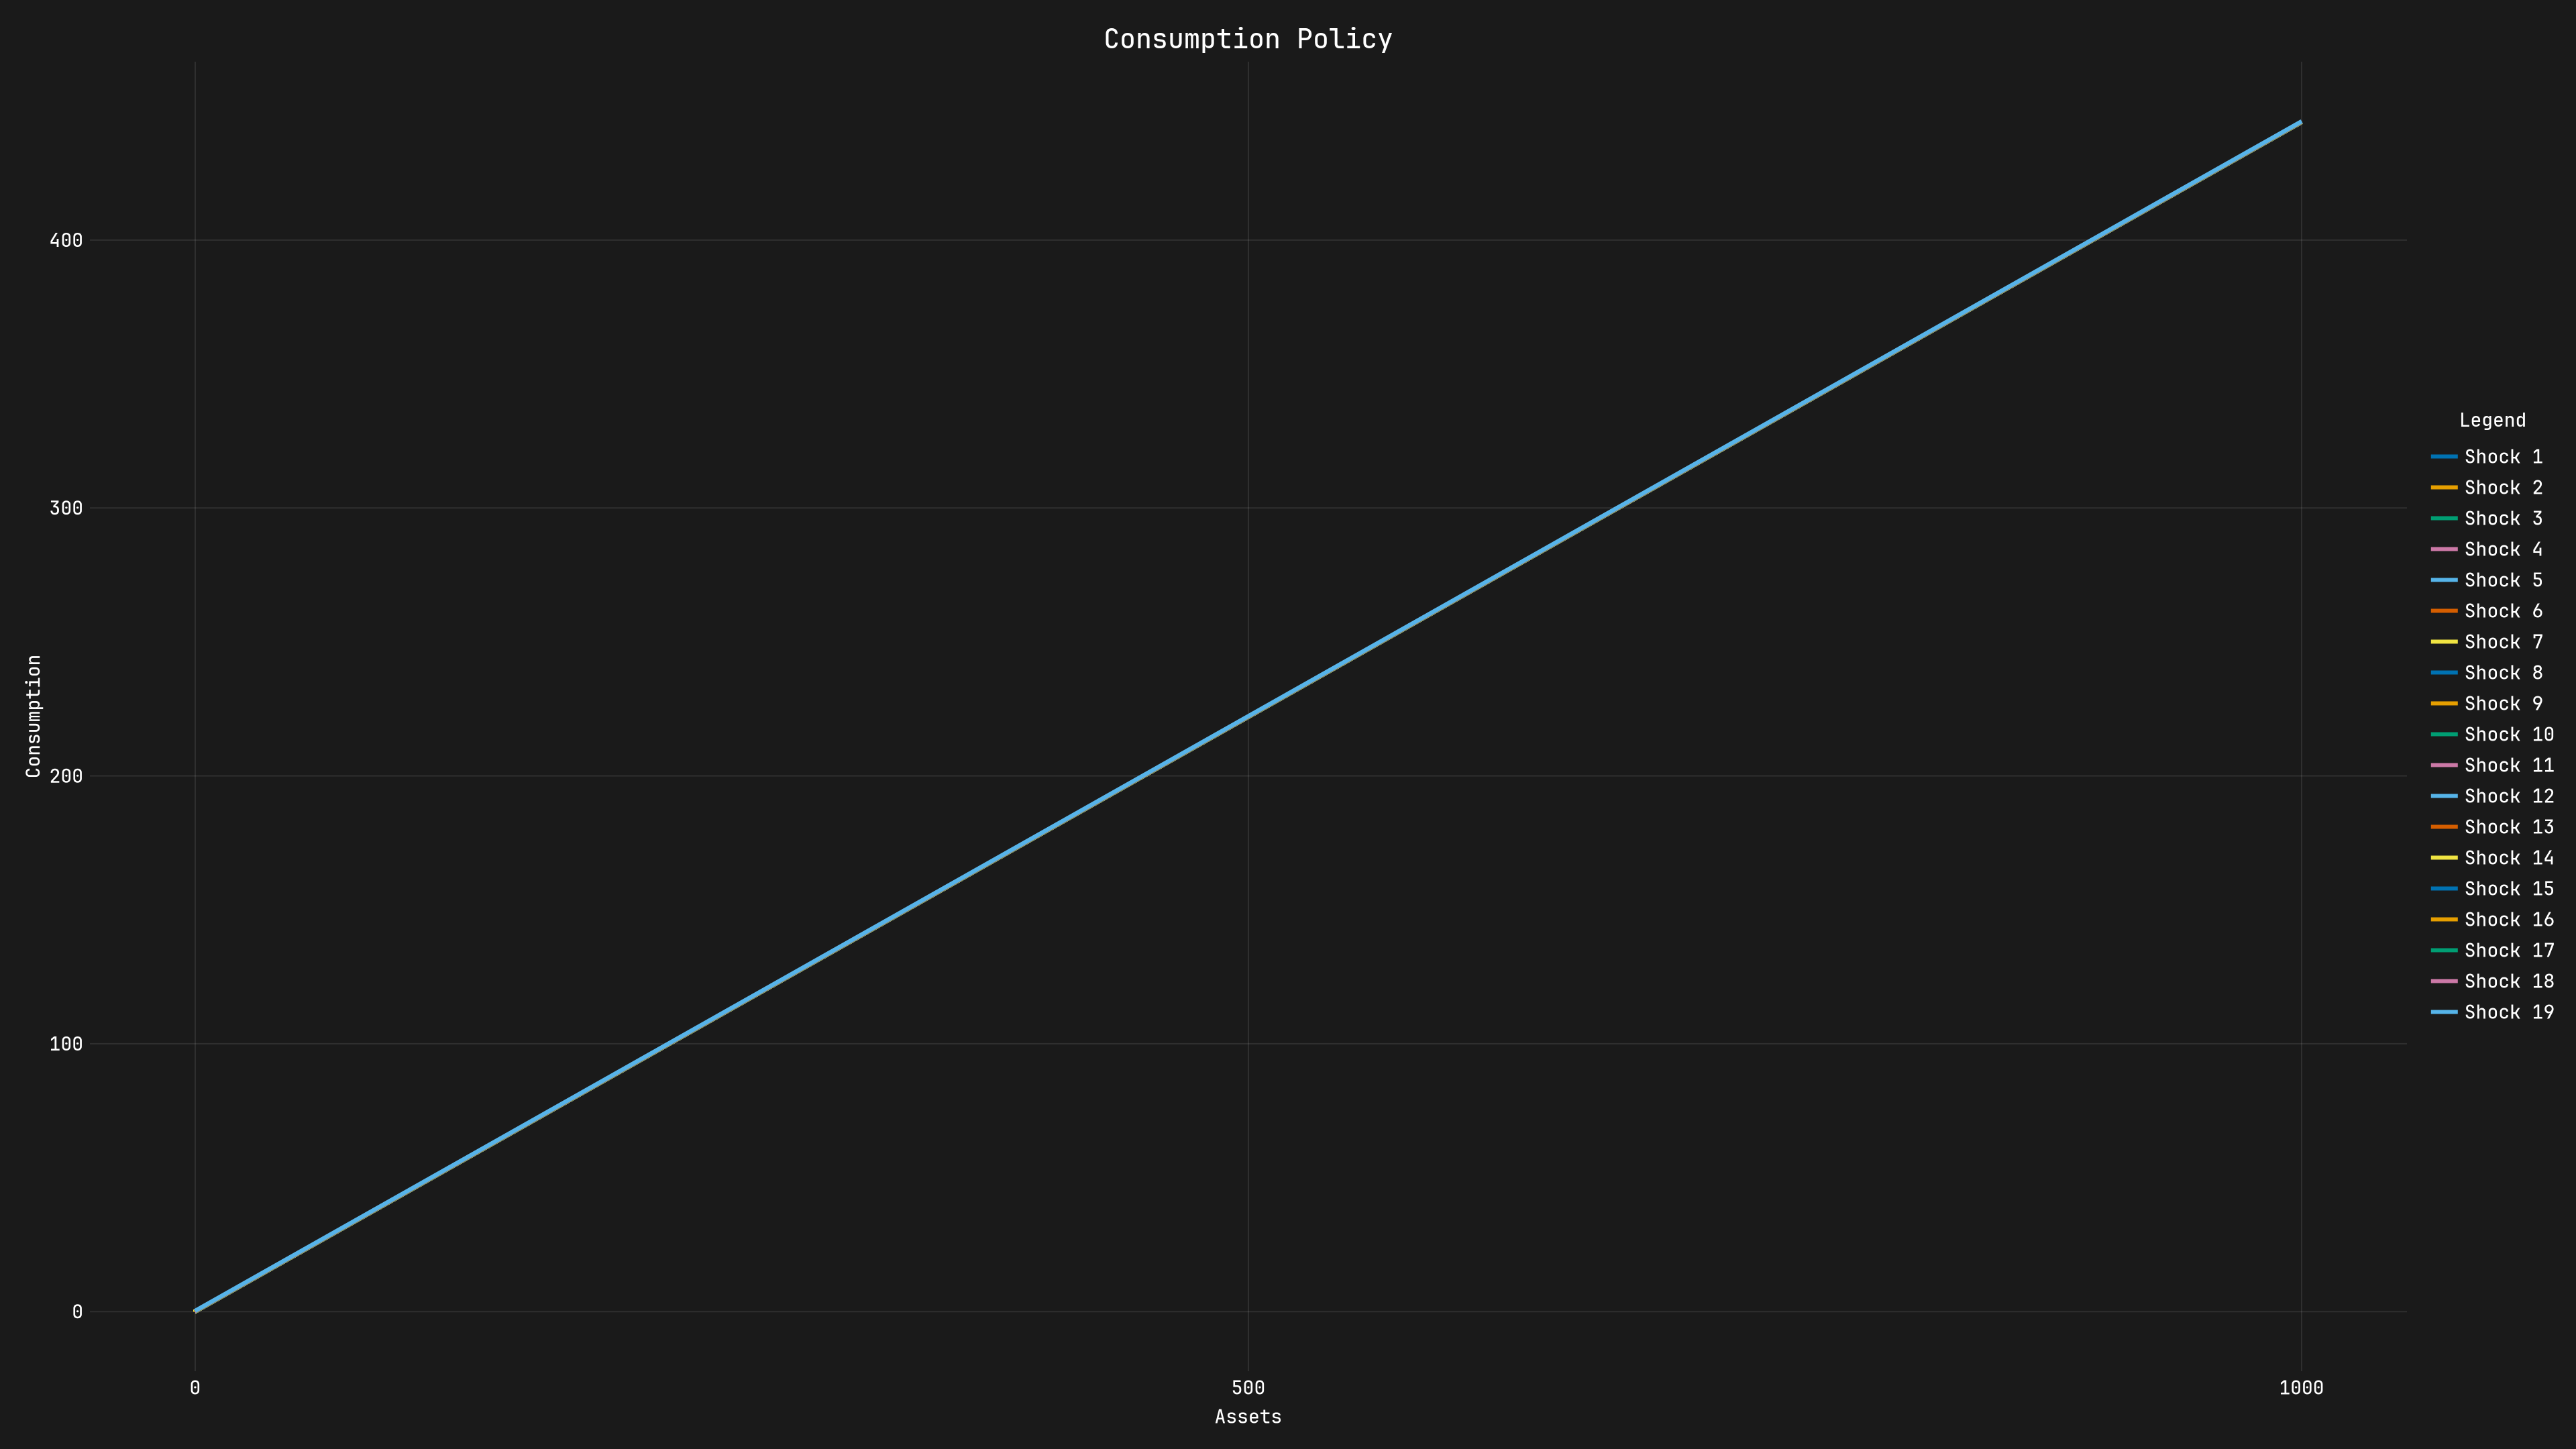

In [76]:
fig = Figure(size = (1920, 1080))

ax = Axis(fig[1, 1], 
        title = "Consumption Policy",
        titlecolor = :white,
        titlefont = "JetBrains Mono",
        titlesize = 20,
        xlabel = "Assets",
        xlabelfont = "JetBrains Mono",
        xlabelcolor = :white,
        ylabel = "Consumption", 
        ylabelfont = "JetBrains Mono",
        ylabelcolor = :white,
        xticklabelcolor = :white, 
        yticklabelcolor = :white,  
        xticklabelfont = "JetBrains Mono", 
        yticklabelfont = "JetBrains Mono")

#xlims!(ax, 0, 1)
#ylims!(ax, 0, 1)

for z in 1:model.nz
    lines!(ax, model.agrid, c[:, z], linewidth = 3, label = "Shock $z")
end

legend = Legend(fig[1, 2], 
                ax, 
                "Legend",  
                orientation = :vertical, 
                fontsize = 4, 
                labelfont = "JetBrains Mono", 
                labelcolor = :white, 
                titlefont = "JetBrains Mono", 
                titlecolor = :white)

fig